In [1]:
from IPython.display import Image

# 11.2 계층적인 트리로 클러스터 조직화
* 계층 군집
    * 장점
        * 덴드로그램(dendrogram(이진 트리 형태로 계층 군집을 시각화할 수 있는 도구))을 그릴 수 있다.
            * 덴드로그램: 의미 있는 분류 체계를 만들어주어 군집 결과를 이해하는 데 도움이 된다.
        * 클러스터 군집 개수를 미리 정할 필요가 없다.
    * 병합 계층 군집(agglomerative hierarchical clustering)
        * 각 샘플이 독립적인 클러스터가 되고 하나의 클러스터가 남을 때까지 가장 가가운 클러스터를 합친다.
    * 분할 계층 군집(divisive hierarchical clustering)
        * 전체 샘플을 포함하는 하나의 클러스터에서 시작하여 더 작은 클러스터(클러스터 안에 샘플이 하나만 남을 때까지)로 반복적으로 나눈다.



### 11.2.1 상향식으로 클러스터 묶기
* 병합 계층 군집
    * 단일 연결
        * 클러스터 쌍에서 가장 비슷한 샘플 간 거리를 계산
        * 그 다음 이 거리가 가장 작은 두 클러스터를 합친다
    * 완전 연결
        * 클러스터 쌍에서 가장 비슷하지 않은 샘플을 비교하여 병합 수행
        

In [2]:
# 단일 연결과 완전 연결
Image(url='https://git.io/JLdsq', width=400) 

* 병합 계층 군집에서 다른 종류의 연결 방식
    * 평균 연결
        * 두 클러스터에 있는 모든 샘플 사이의 평균 거리가 가장 작은 클러스터 쌍을 합친다
    * 와드 연결
        * 클러스터내 SSE가 가장 작게 증가하는 두 클러스터를 합친다

* 완전 연결 계층 군집 프로세트
    1. 모든 샘플의 거리 행렬을 계산
    2. 모든 데이터 포인트를 단일 클러스터로 표현
    3. 가장 비슷하지 않은 (멀리 떨어진) 샘플 사이 거리에 기초하여 가장 가까운 두 클러스터를 합친다
    4. 유사도 행렬 업데이트
    5. 하나의 클러스터가 남을 때까지 2~4단계를 반복

In [3]:
# 랜덤 샘플 데이터
import numpy as np
import pandas as pd

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 11.2.2 거리 행렬에서 계층 군집 수행

In [4]:
# 거리 행렬 게산
# scipy.spatial.distance.pdist : 계층 군집 알고리즘의 입력에 사용할 거리 행렬을 계산하기 위한 함수
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(
                        pdist(df, metric='euclidean')),
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


특성 X, Y, Z를 기반으로 데이터셋 모든 샘플 쌍의 유클리디안 거리를 계산했다. pdist 함수는 축약된 거리 행렬을 반환한다. 이를 sqareform 함수에 넣어 샘플 간 거리 대칭 행렬을 만든다.

이후 사이파이 `cluster.hierarchy` 모듈의 `linkage` 함수를 사용해 완전 연결 병합을 적용한다. 이 함수는 연결 행렬(linkage matrix)을 반환한다.

`pdist` 함수에서 계산한 축약된 거리 행렬(상삼각 행렬(upper triangular matrix))을 입력 속성으로 사용할 수 있다. 아니면 `linkage` 함수에 초기 데이터 배열을 전달하고 `'eucliean'` 지표를 매개변수로 사용할 수 있다. `squareform` 함수로 만든 거리 행렬은 `linkage` 함수가 기대한 값과 다르기 때문에 사용하면 안된다.

In [5]:
from scipy.cluster.hierarchy import linkage

In [6]:
# 잘못된 방식 : sqaureform 거리 행렬
row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                for i in range(row_clusters.shape[0])])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [7]:
# 올바른 방식 1: 축약된 거리 행렬
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [8]:
# 올바른 방식 2: 입력 샘플 행렬
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


연결 행렬의 행은 클러스터 병합을 나타낸다. 첫 번째와 두 번째 열은 완전 연결 방식으로 병합된 클러스터를 나타내고, 세 번째 열은 이런 클러스터 간 거리이고, 마지막 열은 클러스터에 있는 샘플 개수이다.

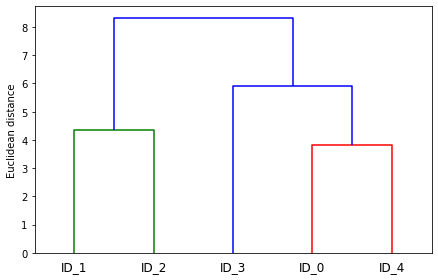

In [9]:
# 연결 행렬 결과를 덴드로그램으로 시각화
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# 검은색 덴드로그램 만들기 (1/2 부분만)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### 11.2.3 히트맵에 덴드로그램 연결
계층 군집 덴드로그램은 히트맵과 함께 자주 사용된다. 히트맵을 사용하면 훈련 샘플을 담고 있는 데이터 배열이나 행렬의 개별 값을 색으로 표현할 수 있다. 

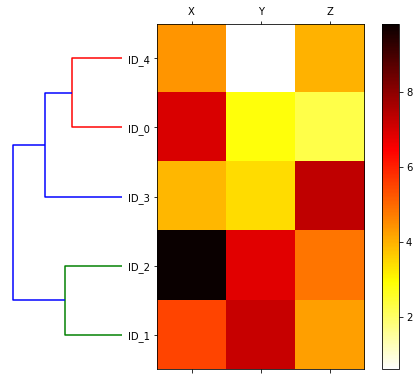

In [10]:
fig = plt.figure(figsize=(8, 8), facecolor='white') # 새로운 figure 객체를 만든다
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6]) # add_axes 메서드를 사용해 덴드로그램의 x축 위치, y축 위치, 너비, 높이를 지정
row_dendr = dendrogram(row_clusters, orientation='left') # 덴드로그램을 반시계 방향으로 90도 회전시킨다
# 참고: matplotlib < v1.5.1일 때는 use orientation='right'를 사용

# 파이썬 딕셔너리인 덴드로그램 객체의 leaves 키에서 얻은 
# 클러스터 레이블을 따라 원본 DataFrame에 있는 데이터를 재정렬
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# 재정렬된 DataFrame에서 히트맵을 만들고 덴드로그램 다음에 위치시킨다
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                  interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False) # 축 눈금을 제거하고 그래프 테두리를 감춘다
fig.colorbar(cax) # 컬러 막대 추가

# 특성과 샘플 이름을 각각 x축과 y축 눈금의 레이블로 할당
axm.set_xticklabels(['']+list(df_rowclust.columns))
axm.set_yticklabels(['']+list(df_rowclust.index))

plt.show()

히트맵의 행 순서는 덴드로그램에 있는 샘플 군집을 반영한다. 간단한 덴드로그램과 샘플과 특성 값에 컬러를 입힌 히트맵을 함께 나타내면 데이터셋을 요약할 수 있다.

### 11.2.4 사이킷런에서 병합 군집 적용
* 사이킷런 병합 군집: AgglomerativeClustering 클래스
    * 원하는 클러스터 개수 지정 ex) n_cluster=3: 입력 샘플을 세 개의 클러스터
    * 계층 군집의 트리 성장을 일찍 멈추게 할 수 있다.

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [1 0 0 2 1]


첫 번째와 다 섯번째 샘플(ID_0과 ID_4)이 하나의 클러스터(레이블 1)에 할당되었고, 샘플 ID_1과 ID_2가 두 번째 클러스터(레이블 0)에 할당된 것을 볼 수 있다. 샘플 ID_3은 자기 자신이 클러스터가 되었다(레이블 2). 대체적으로 덴드로그램으로 본 것과 결과가 동일하다. 덴드로그램에서는 ID_3이 ID_1이나 ID_2보다는 ID_4와 ID_0에 더 가깝다. 사이킷런의 군집 결과에서는 이 점이 확실하지 않다.

In [13]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [0 1 1 0 0]


* `AgglomerativeClustering`의 linkage 매개변수
    * 'ward', 'complete', 'average', 'single'
    *  default='ward'
    

# 11.3 DBSCAN을 사용하여 밀집도가 높은 지역 찾기
* DBSCAN(Density-Based Spatial Clustering of Application with Noise) 군집 알고리즘
    * 샘플이 조밀하게 모인 지역에 클러스터 레이블을 할당
    * 밀집도란 특정 반경 안에 있는 샘플 개수로 정의
    * 레이블 할당
        * 어떤 샘플의 특정 반경 안에 있는 이웃 샘플이 지정된 개수(MinPts) 이상이면 **핵심 샘플**(core point)이 된다.
        * 반경 이내 MinPts보다 이웃이 적지만 다른 핵심 샘플 반경 안에 있으면 **경계 샘플**(border point)이 된다.
        * 핵심 샘플과 경계 샘플이 아닌 다른 모든 샘플은 **잡음 샘플**(noise point)이 된다.
    * 핵심 샘플, 경계 샘플, 잡음 샘플로 레이블을 할당한 후 DBSCAN 알고리즘 단계
        1. 개별 핵심 샘플이나 핵심 샘플의 그룹을 클러스터로 만든다.
        2. 경계 샘플을 해당 핵심 샘플의 클러스터에 할당

In [14]:
# DBSCAN의 핵심 샘플, 경계 샘플, 잡음 샘플
Image(url='https://git.io/JLdsY', width=500) 

DBSCAN은 k-평균처럼 클러스터 모양을 원형으로 가정하지 않는다. 또 k-평균이나 계층 군집과는 달리 모든 샘플을 클러스터에 할당하지 않고 잡음 샘플을 구분하는 능력이 있다.

In [15]:
from sklearn.datasets import make_moons

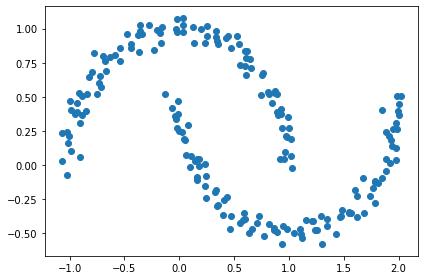

In [16]:
# 반달 모양 형태를 가진 데이터셋
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

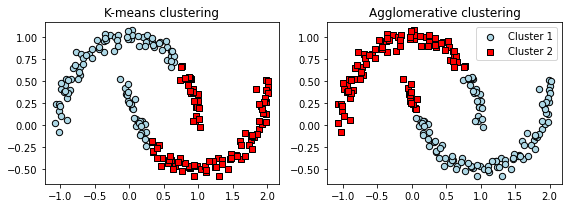

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# k-평균 알고리즘
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

# 완전 연결 병합 군집 알고리즘
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

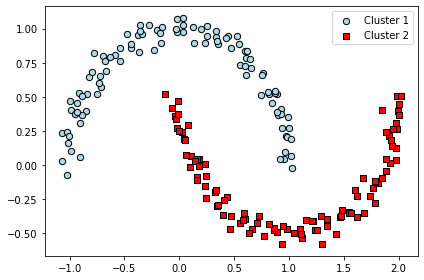

In [18]:
# DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='Cluster 2')

plt.legend()
plt.tight_layout()
plt.show()

DBSCAN 알고리즘은 성공적으로 반달 모양을 감지했다. DBSCAN 장점 중 하나인 임의 형태의 데이터를 처리할 수 있는 능력을 확인했다.

* DBSCAN 단점
    * 데이터셋에서 훈련 샘플 개수가 고정되어 있다고 가정하면, 특성 개수가 늘어나면 차원의 저주로 인한 역효과가 증가한다.
        * 특히 유클리디안 거리 측정을 사용할 때 문제가 된다.
        * 차원의 저주는 유클리디안 거리 측정을 사용하는 다른 군집 알고리즘에도 영향을 미친다.
            * ex) k-평균 알고리즘, 계층 군집 알고리즘

DBSCAN이 좋은 군집 결과를 만들려면 두 개의 하이퍼파라미터(MinPts와 $ℇ$)를 최적화해야 한다. 데이터셋에 있는 밀집 영역의 크기가 많이 차이 나면 알맞는 MinPts와 $ℇ$ 조합을 찾는 일이 어렵다.

또한 성공적인 군집은 알고리즘이나 하이퍼파라미터에만 의존하는 것이 아니다. 오히려 적절한 거리 지표를 선택하고 실험 환경을 구성하는 데 도움을 줄 수 있는 도메인 지식이 더 중요할 수 있다.

차원의 저주를 고려하면 군집을 수행하기 전에 차원 축소 기법을 적용하는 것이 일반적이다. 비지도 학습용 데이터셋을 위한 차원 축소 기법에는 주성분 분석과 RBF 커널 주성분 분석이 해당된다. 또 데이터셋을 2차원 부분 공간으로 압축하면 2차원 산점도에서 클러스터를 시각화하고 레이블을 할당할 수 있다.

* 그래프 기반 군집(graph-based clustering)
    * 스펙트럴 군집(spectral clustering)
        * 유사도 행렬 또는 거리 행렬의 고유 벡터를 사용하여 클러스터 관계를 유도한다.